# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [1]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [3]:
# Define a function to load data and aggregate them

def create_df(list_of_files):
  df_final=pd.DataFrame()
  for x in list_of_files:
    df=pd.read_csv(x)
    df_final=pd.concat([df,df_final])

  return df_final.sort_values(["Date","Name"]).reset_index(drop=True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')


file_list = [
    "/content/drive/MyDrive/RNN_Stock_Price_Prediction_Vishal/RNN_Stocks_Data/AMZN_stocks_data.csv",
    "/content/drive/MyDrive/RNN_Stock_Price_Prediction_Vishal/RNN_Stocks_Data/GOOGL_stocks_data.csv",
    "/content/drive/MyDrive/RNN_Stock_Price_Prediction_Vishal/RNN_Stocks_Data/IBM_stocks_data.csv",
    "/content/drive/MyDrive/RNN_Stock_Price_Prediction_Vishal/RNN_Stocks_Data/MSFT_stocks_data.csv"
]

import pandas as pd

def create_df(file_list):
    df_list = [pd.read_csv(file) for file in file_list]
    return pd.concat(df_list, ignore_index=True)


stock_data = create_df(file_list)


Mounted at /content/drive


In [5]:
# View specifics of the data
stock_data.head(20)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN
5,2006-01-10,46.41,46.75,45.36,45.65,9686957,AMZN
6,2006-01-11,45.65,45.70,44.26,44.93,8497383,AMZN
7,2006-01-12,44.79,45.09,44.09,44.36,5818301,AMZN
8,2006-01-13,44.48,44.85,44.00,44.40,4432237,AMZN
9,2006-01-17,43.95,44.32,43.66,44.00,5635225,AMZN


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12077 non-null  object 
 1   Open    12076 non-null  float64
 2   High    12077 non-null  float64
 3   Low     12076 non-null  float64
 4   Close   12077 non-null  float64
 5   Volume  12077 non-null  int64  
 6   Name    12077 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 660.6+ KB


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [7]:
# Handle Missing Values
stock_data.isnull().sum()

,0
Date,0
Open,1
High,0
Low,1
Close,0
Volume,0
Name,0


In [8]:
# As there are only two null values, we can just remove those rows
stock_data.dropna(inplace=True)

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12076 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12076 non-null  object 
 1   Open    12076 non-null  float64
 2   High    12076 non-null  float64
 3   Low     12076 non-null  float64
 4   Close   12076 non-null  float64
 5   Volume  12076 non-null  int64  
 6   Name    12076 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 754.8+ KB


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

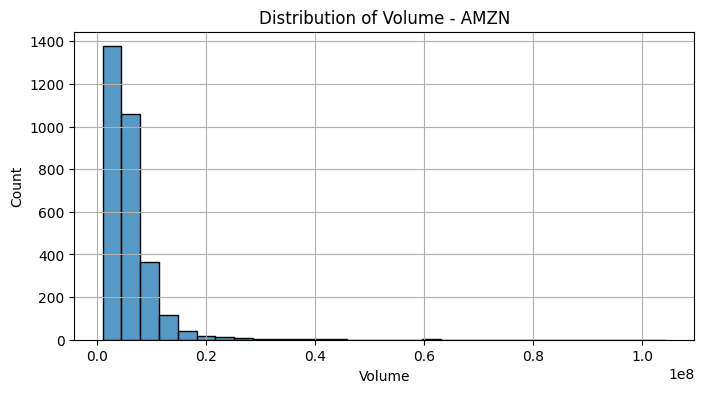

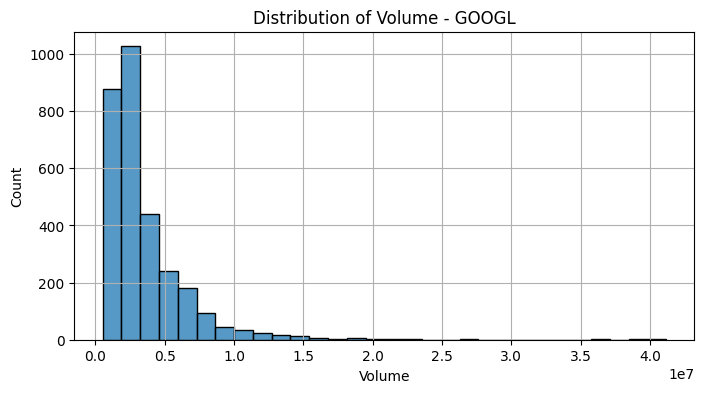

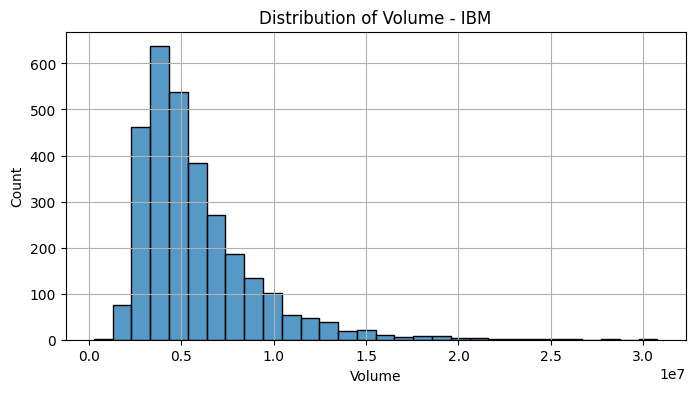

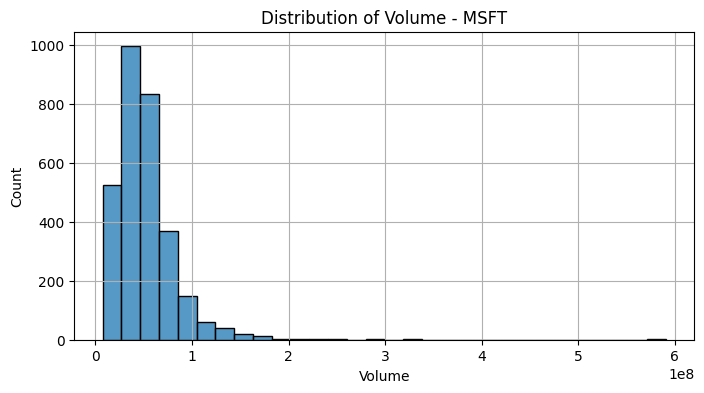

In [10]:
# Frequency distribution of volumes
for name in stock_data["Name"].unique():
    plt.figure(figsize=(8, 4))  # Create a new figure for each stock
    sns.histplot(stock_data[stock_data['Name'] == name]["Volume"], kde=False, bins=30)
    plt.title(f'Distribution of Volume - {name}')
    plt.xlabel('Volume')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

<Axes: xlabel='None', ylabel='Volume'>

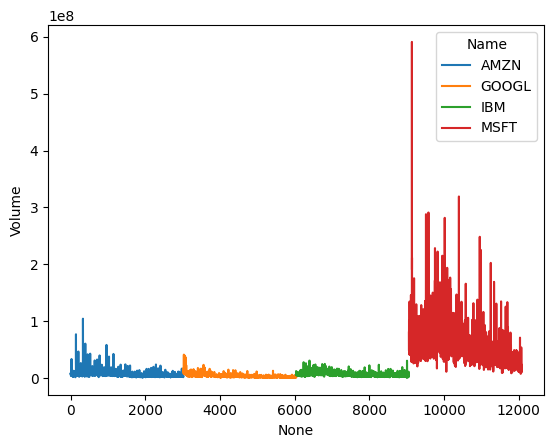

In [11]:
# Stock volume variation over time
sns.lineplot(data=stock_data, x=stock_data.index, y='Volume', hue='Name')

In [12]:
# Changing 'Date' column to datetime data-type so that i can extract month from the same and do some aggregate analysis.
stock_data['Date']=pd.to_datetime(stock_data['Date'])
stock_data['month']=stock_data['Date'].dt.month
stock_data['year']=stock_data['Date'].dt.year
stock_data['MonthYear'] = stock_data['Date'].dt.to_period('M').astype(str)

In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12076 entries, 0 to 12076
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12076 non-null  datetime64[ns]
 1   Open       12076 non-null  float64       
 2   High       12076 non-null  float64       
 3   Low        12076 non-null  float64       
 4   Close      12076 non-null  float64       
 5   Volume     12076 non-null  int64         
 6   Name       12076 non-null  object        
 7   month      12076 non-null  int32         
 8   year       12076 non-null  int32         
 9   MonthYear  12076 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(2)
memory usage: 943.4+ KB


In [14]:
stock_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0
month,0
year,0
MonthYear,0


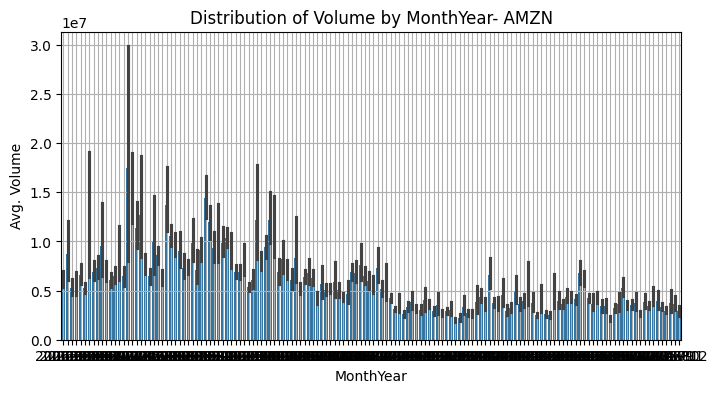

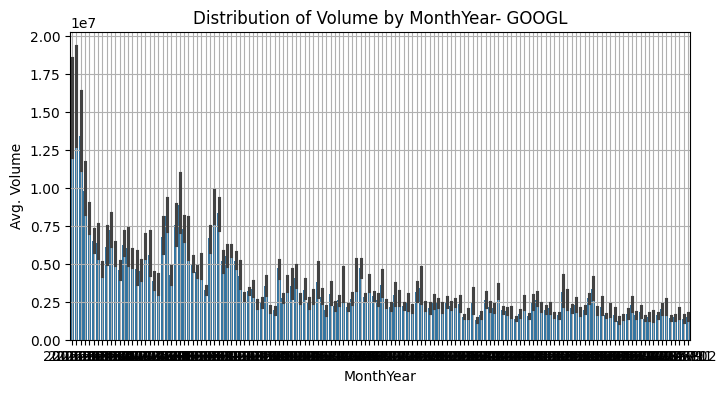

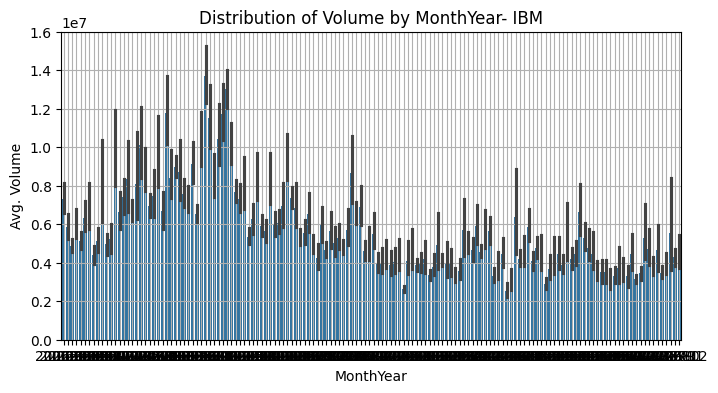

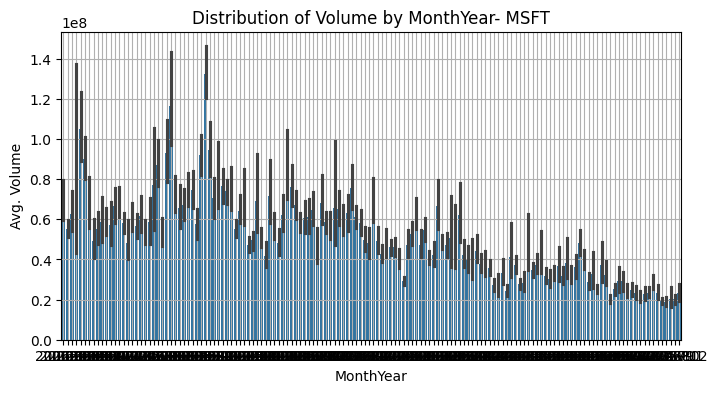

In [15]:
# Plotting average volumes traded at the month level
for x in stock_data["Name"].unique():
  figure=plt.figure(figsize=(8,4))
  sns.barplot(data=stock_data[stock_data['Name']==x],x='MonthYear',y='Volume',estimator=np.mean)
  plt.title(f'Distribution of Volume by MonthYear- {x}')
  plt.xlabel('MonthYear')
  plt.ylabel('Avg. Volume')
  plt.grid(True)
  plt.show()

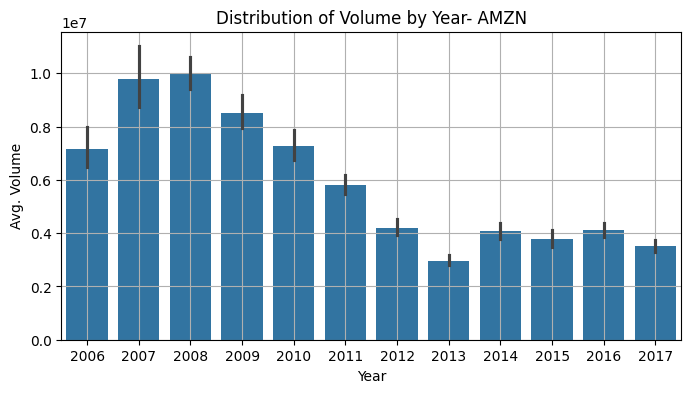

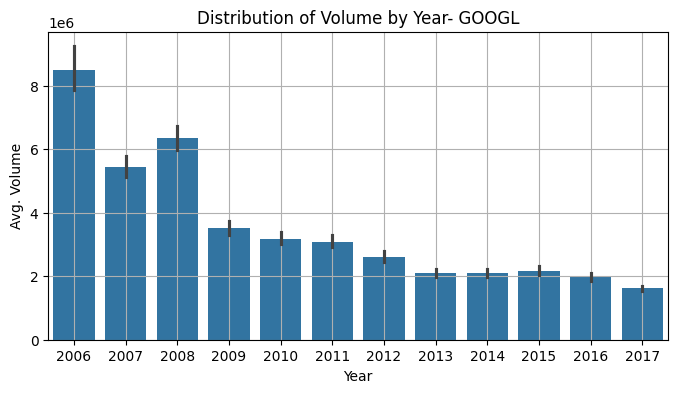

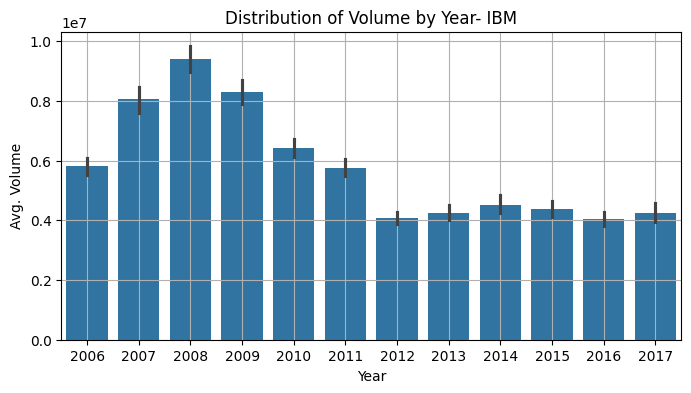

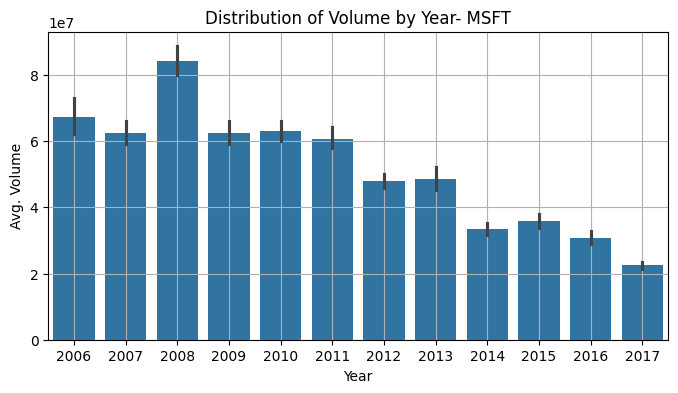

In [16]:
# Plotting average volumes traded at the year level
for x in stock_data["Name"].unique():
  figure=plt.figure(figsize=(8,4))
  sns.barplot(data=stock_data[stock_data['Name']==x],x='year',y='Volume',estimator=np.mean)
  plt.title(f'Distribution of Volume by Year- {x}')
  plt.xlabel('Year')
  plt.ylabel('Avg. Volume')
  plt.grid(True)
  plt.show()

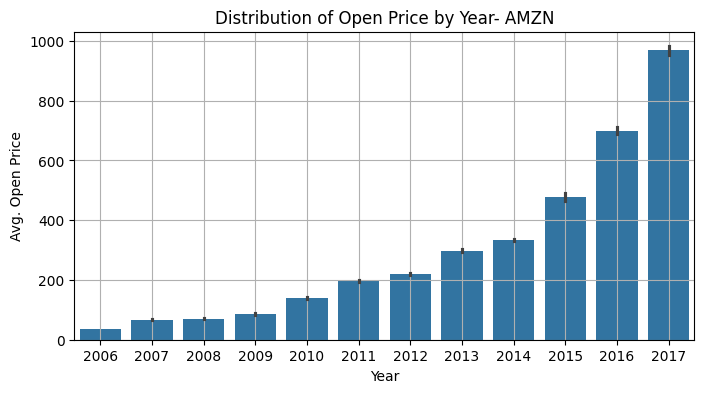

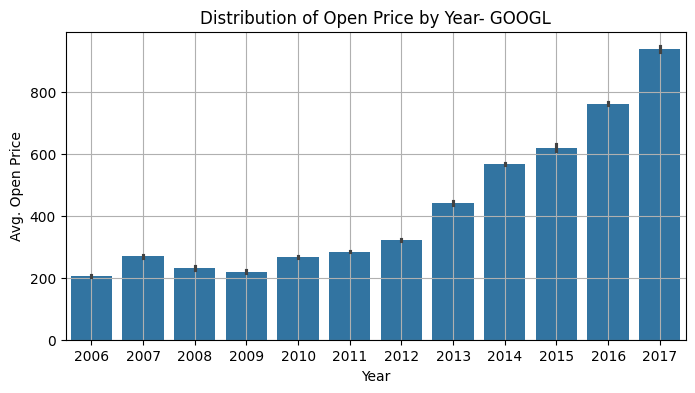

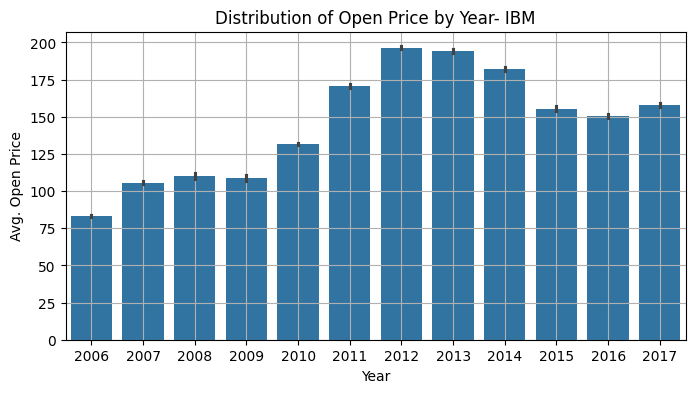

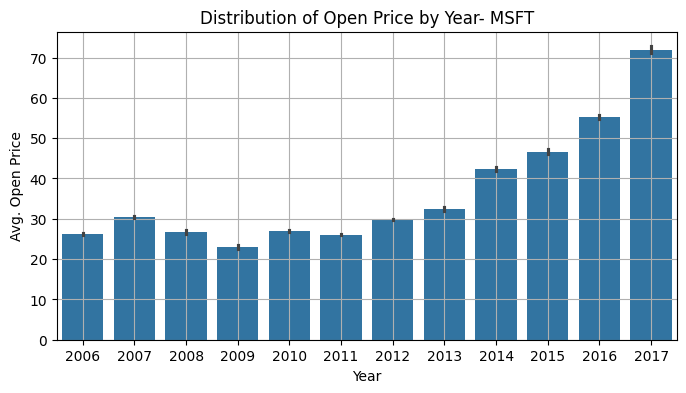

In [17]:
# Plotting average "Open" price at the year level
for x in stock_data["Name"].unique():
  figure=plt.figure(figsize=(8,4))
  sns.barplot(data=stock_data[stock_data['Name']==x],x='year',y='Open',estimator=np.mean)
  plt.title(f'Distribution of Open Price by Year- {x}')
  plt.xlabel('Year')
  plt.ylabel('Avg. Open Price')
  plt.grid(True)
  plt.show()

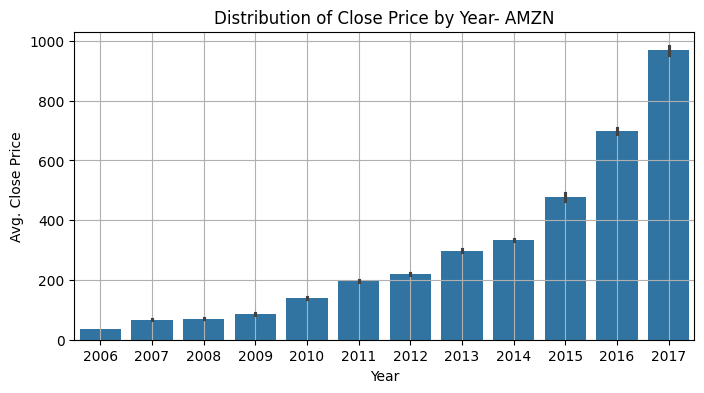

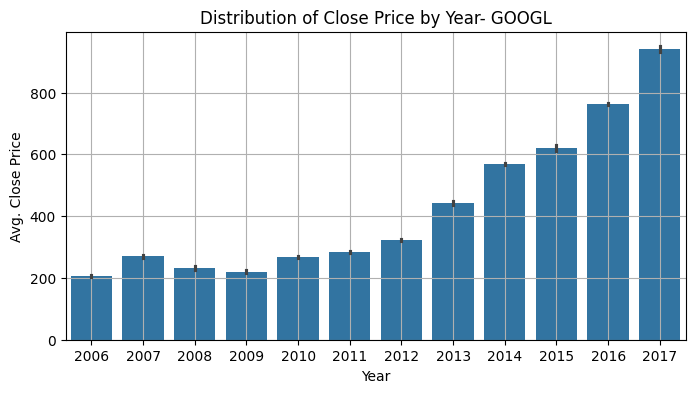

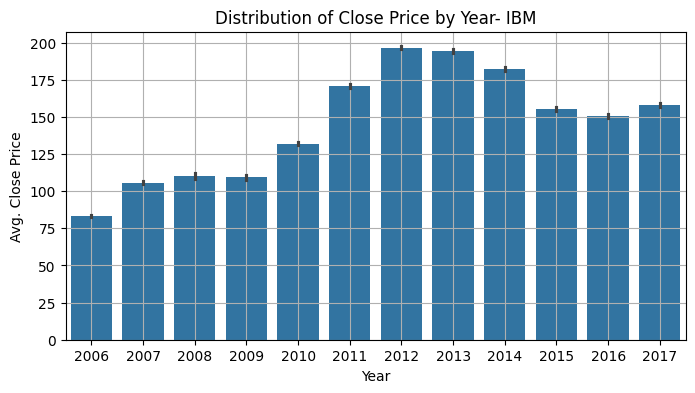

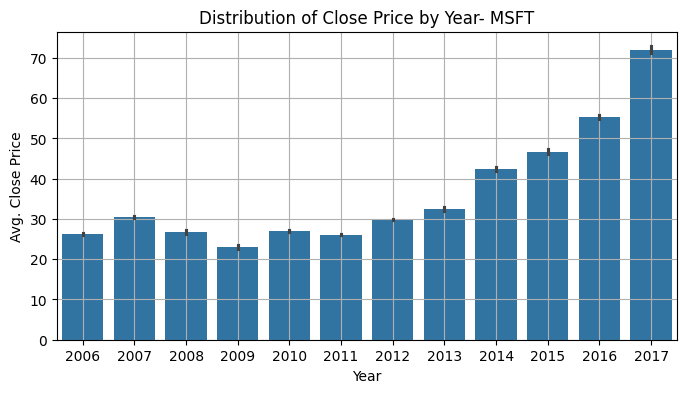

In [18]:
# Plotting average "Close" price at the year level
for x in stock_data["Name"].unique():
  figure=plt.figure(figsize=(8,4))
  sns.barplot(data=stock_data[stock_data['Name']==x],x='year',y='Close',estimator=np.mean)
  plt.title(f'Distribution of Close Price by Year- {x}')
  plt.xlabel('Year')
  plt.ylabel('Avg. Close Price')
  plt.grid(True)
  plt.show()

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

In [19]:
# Analyse correlations
num_cols=[x for x in stock_data.columns if stock_data[x].dtype in ('float64','int64')]
stock_data[num_cols].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999945,0.999919,0.999873,-0.420741
High,0.999945,1.000000,0.999907,0.999935,-0.421103
Low,0.999919,0.999907,1.000000,0.999945,-0.420673
Close,0.999873,0.999935,0.999945,1.000000,-0.420895
Volume,-0.420741,-0.421103,-0.420673,-0.420895,1.000000


### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [20]:
# Pivot the data to have data for a single day in one row. Each date will then act as one element of the window.
pivoted = stock_data.pivot_table(index='Date', columns='Name', values=['Open', 'High', 'Low', 'Close', 'Volume'])
pivoted.columns = [f"{col[0]}_{col[1]}" for col in pivoted.columns]
pivoted.head()

,Close_AMZN,Close_GOOGL,Close_IBM,Close_MSFT,High_AMZN,High_GOOGL,High_IBM,High_MSFT,Low_AMZN,Low_GOOGL,Low_IBM,Low_MSFT,Open_AMZN,Open_GOOGL,Open_IBM,Open_MSFT,Volume_AMZN,Volume_GOOGL,Volume_IBM,Volume_MSFT
Date,,,,,,,,,,,,,,,,,,,,
2006-01-03,47.58,217.83,82.06,26.84,47.85,218.05,82.55,27.00,46.25,209.32,80.81,26.10,47.47,211.47,82.45,26.25,7582127.0,13137450.0,11715200.0,79974418.0
2006-01-04,47.25,222.84,81.95,26.97,47.73,224.70,82.50,27.08,46.69,220.09,81.33,26.77,47.48,222.17,82.20,26.77,7440914.0,15292353.0,9840600.0,57975661.0
2006-01-05,47.65,225.85,82.50,26.99,48.20,226.00,82.90,27.13,47.11,220.97,81.00,26.91,47.16,223.22,81.40,26.96,5417258.0,10815661.0,7213500.0,48247610.0
2006-01-06,47.87,233.06,84.95,26.91,48.58,235.49,85.03,27.00,47.32,226.85,83.41,26.49,47.97,228.66,83.95,26.89,6154285.0,17759521.0,8197400.0,100969092.0
2006-01-09,47.08,233.68,83.73,26.86,47.10,236.94,84.25,27.07,46.40,230.70,83.38,26.76,46.55,233.44,84.10,26.93,8945056.0,12795837.0,6858200.0,55627836.0


In [21]:
pivoted=pivoted.dropna()

In [22]:
# Define a function that divides the data into windows and generates target variable values for each window

def window_func(window_size, window_stride, target_stock):
  x = []
  y = []

  pivoted_values = pivoted.values

  for i in range(window_size, len(pivoted),window_stride ):
      x.append(pivoted_values[i-window_size:i])
      y.append(pivoted_values[i][pivoted.columns.get_loc("Close_" + target_stock)])

  x = np.array(x)
  y = np.array(y)
  return(x,y)


In [23]:
x,y=window_func(60,1,'AMZN')
print(x.shape)
print(y.shape)

(2958, 60, 20)
(2958,)


In [24]:
np.isnan(x).sum()

np.int64(0)

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [25]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

from sklearn.preprocessing import StandardScaler
import numpy as np

def scale_windows(x):

    num_windows, window_size, num_features = x.shape
    x_scaled = np.empty_like(x)

    scaler = StandardScaler()

    for i in range(num_windows):
        scaler.partial_fit(x[i])

    for i in range(num_windows):
        x_scaled[i] = scaler.transform(x[i])

    return x_scaled, scaler


Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [26]:
# Define a function to create input and output data points from the master DataFrame

def data_split(data_df,target_stock,window_size,window_stride,split_ratio):
  x,y=window_func(window_size,window_stride,target_stock)
  x_scaled,scaler=scale_windows(x)
  x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=split_ratio, random_state=42)
  return x_train, x_test, y_train, y_test,scaler

We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

In [27]:
# Checking for patterns in different sequence lengths
stock_data=stock_data.drop(['month','MonthYear'],axis=1)
stock_data.info()
stock_data['Quarter_Year']=stock_data['Date'].dt.to_period('Q').astype(str)
stock_data['Month_Year']=stock_data['Date'].dt.to_period('M').astype(str)
stock_data['Week_Year'] = stock_data['Date'].dt.strftime('%Y_week%U')
stock_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 12076 entries, 0 to 12076
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12076 non-null  datetime64[ns]
 1   Open    12076 non-null  float64       
 2   High    12076 non-null  float64       
 3   Low     12076 non-null  float64       
 4   Close   12076 non-null  float64       
 5   Volume  12076 non-null  int64         
 6   Name    12076 non-null  object        
 7   year    12076 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 801.9+ KB


,Date,Open,High,Low,Close,Volume,Name,year,Quarter_Year,Month_Year,Week_Year
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006,2006Q1,2006-01,2006_week01
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006,2006Q1,2006-01,2006_week01
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006,2006Q1,2006-01,2006_week01
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006,2006Q1,2006-01,2006_week01
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006,2006Q1,2006-01,2006_week02
5,2006-01-10,46.41,46.75,45.36,45.65,9686957,AMZN,2006,2006Q1,2006-01,2006_week02
6,2006-01-11,45.65,45.70,44.26,44.93,8497383,AMZN,2006,2006Q1,2006-01,2006_week02
7,2006-01-12,44.79,45.09,44.09,44.36,5818301,AMZN,2006,2006Q1,2006-01,2006_week02
8,2006-01-13,44.48,44.85,44.00,44.40,4432237,AMZN,2006,2006Q1,2006-01,2006_week02
9,2006-01-17,43.95,44.32,43.66,44.00,5635225,AMZN,2006,2006Q1,2006-01,2006_week03


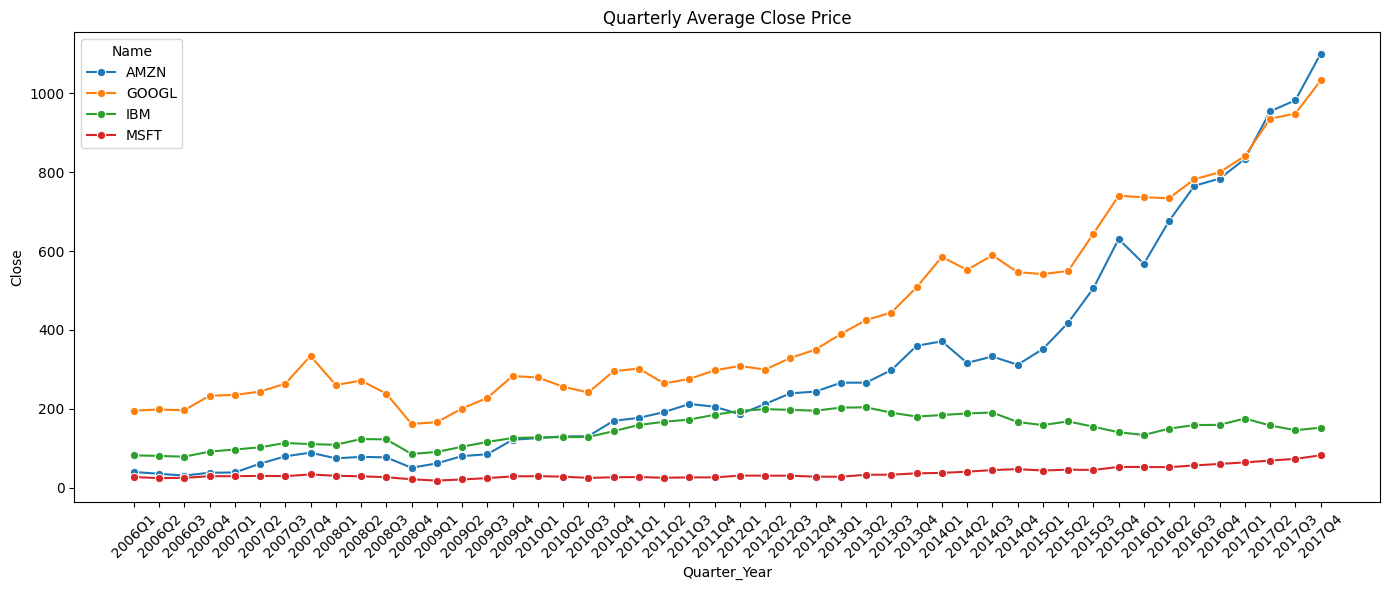

In [28]:
# Checking quarter level patterns

quarterly_data = stock_data.groupby(['Quarter_Year', 'Name'])['Close'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=quarterly_data, x='Quarter_Year', y='Close', hue='Name', marker='o')
plt.xticks(rotation=45)
plt.title("Quarterly Average Close Price")
plt.tight_layout()
plt.show()


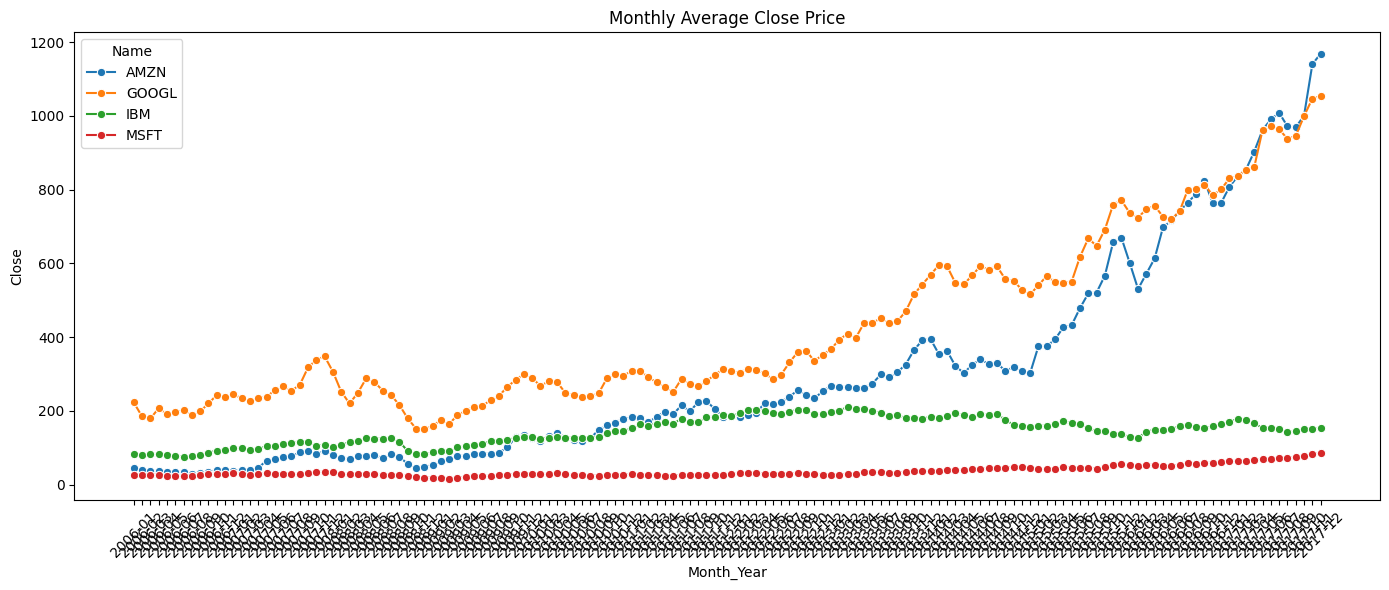

In [29]:
# Checking month level patterns

quarterly_data = stock_data.groupby(['Month_Year', 'Name'])['Close'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=quarterly_data, x='Month_Year', y='Close', hue='Name', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Average Close Price")
plt.tight_layout()
plt.show()


In [30]:
# Decision
# Based on this we can see that the quarterly patterns are more promising. So we shallgo for quarterly patterns

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [31]:
# Define a function to create input and output data points from the master DataFrame

def data_split(data_df,target_stock,window_size,window_stride,split_ratio):
  x,y=window_func(window_size,window_stride,target_stock)
  x_scaled,scaler=scale_windows(x)
  x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=split_ratio, random_state=42)
  return x_train, x_test, y_train, y_test,scaler

In [32]:
# Create data instances from the master data frame using decided window size and window stride
x_train, x_test, y_train, y_test,scaler=data_split(pivoted,'AMZN',90,1,400)

In [33]:
# Check the number of data points generated
print("Number of training data points : ",len(x_train))
print("Number of testing data points : ",len(x_test))

Number of training data points :  2528
Number of testing data points :  400


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [34]:
# Check if the datasets are compatible inputs to neural networks
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("\n")
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test : ",y_test.shape)
print("\n")
print("xtrain is of the type : ",type(x_train))
print("ytrain is of the type : ",type(y_train))
print("\n")
print("xtest is of the type : ",type(x_test))
print("ytest is of the type : ",type(y_test))

Shape of x_train :  (2528, 90, 20)
Shape of y_train :  (2528,)


Shape of x_test:  (400, 90, 20)
Shape of y_test :  (400,)


xtrain is of the type :  <class 'numpy.ndarray'>
ytrain is of the type :  <class 'numpy.ndarray'>


xtest is of the type :  <class 'numpy.ndarray'>
ytest is of the type :  <class 'numpy.ndarray'>


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU
from tensorflow.keras.optimizers import Adam, SGD

In [36]:
# Check if the datasets are compatible inputs to neural networks
print("Shape of x_train : ",x_train.shape)
print("Shape of y_train : ",y_train.shape)
print("\n")
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test : ",y_test.shape)
print("\n")
print("xtrain is of the type : ",type(x_train))
print("ytrain is of the type : ",type(y_train))
print("\n")
print("xtest is of the type : ",type(x_test))
print("ytest is of the type : ",type(y_test))

Shape of x_train :  (2528, 90, 20)
Shape of y_train :  (2528,)


Shape of x_test:  (400, 90, 20)
Shape of y_test :  (400,)


xtrain is of the type :  <class 'numpy.ndarray'>
ytrain is of the type :  <class 'numpy.ndarray'>


xtest is of the type :  <class 'numpy.ndarray'>
ytest is of the type :  <class 'numpy.ndarray'>


In [37]:
# Create a function that creates a simple RNN model according to the model configuration arguments
def RNN_Model(RNN_type,num_cells,activation,dropout,timesteps,features,optimizer,loss_func,metric,epochs,batch_size):
  model=keras.Sequential()
  model.add(RNN_type(units=num_cells,activation=activation,dropout=dropout,input_shape=(timesteps,features)))
  model.add(Dense(1,activation="linear"))
  model.compile(optimizer=optimizer,loss=loss_func,metrics=metric)
  model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

In [38]:
RNN_Model(SimpleRNN, 64, "relu", 0.2, 90, 20, Adam(learning_rate=0.0001), "mean_squared_error", ["mae"], 50, 32)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 175694.1562 - mae: 311.5424 - val_loss: 161684.9844 - val_mae: 297.8037
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 179467.8906 - mae: 312.2930 - val_loss: 153811.7812 - val_mae: 291.9298
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 120731.8281 - mae: 251.0241 - val_loss: 16078.1035 - val_mae: 111.1130
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 17442.9082 - mae: 105.1885 - val_loss: 9182.8535 - val_mae: 78.1165
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 12463.2217 - mae: 89.8708 - val_loss: 7800.1943 - val_mae: 70.0949
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11280.1982 - mae: 80.8554 - val_loss: 6365.0840 - val_mae: 59.4120
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9480.8623 - mae: 72.6036 - val_loss: 4400.3096 - val_mae: 48.7412
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8346.2676 - mae: 66.4371 - val_loss: 4533.4082 - va

#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [39]:
# Create a function that creates a simple RNN model according to the model configuration arguments
def RNN_Model(RNN_type,num_cells,activation,dropout,timesteps,features,optimizer,loss_func,metric,epochs,batch_size):
  model=keras.Sequential()
  model.add(RNN_type(units=num_cells,activation=activation,dropout=dropout,input_shape=(timesteps,features)))
  model.add(Dense(1,activation="linear"))
  model.compile(optimizer=optimizer,loss=loss_func,metrics=metric)
  history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=0)
  val_loss = history.history['val_loss'][-1]  # Last epoch's validation loss
  return model, val_loss

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

RNN_types = [SimpleRNN]
num_cells_options = [64,120]
activations = ["tanh", "relu"]
dropouts = [0.2, 0.3, 0.35]
optimizers = [Adam, SGD]
learning_rates=[.01,.001]
epochs = [20, 30]
batch_sizes = [32, 64]
params_list=[]

for RNN_type in RNN_types:
    for num_cells in num_cells_options:
        for activation in activations:
            for dropout in dropouts:
                 for epoch in epochs:
                     for batch_size in batch_sizes:
                        for optimizer_type in optimizers:
                            for lr in learning_rates:
                              optimizer = optimizer_type(learning_rate=lr)
                              model, val_loss = RNN_Model(RNN_type, num_cells, activation, dropout, 90, 20,optimizer, "mean_squared_error",["mae"], epoch, batch_size)
                              print("Final Validation Loss:", val_loss)
                              params_list.append({
                                    "RNN_type": RNN_type.__name__,
                                    "num_cells": num_cells,
                                    "activation": activation,
                                    "dropout": dropout,
                                    "optimizer": type(optimizer).__name__,
                                    "learning_rate": float(optimizer.learning_rate.numpy()),
                                    "epochs": epoch,
                                    "batch_size": batch_size,
                                    "val_loss": val_loss
                                })

params_df = pd.DataFrame(params_list)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Final Validation Loss: 10199.7529296875
Final Validation Loss: 115283.9765625
Final Validation Loss: 9140.54296875
Final Validation Loss: 10667.3974609375
Final Validation Loss: 34525.90625
Final Validation Loss: 129745.703125
Final Validation Loss: 9827.3203125
Final Validation Loss: 22753.095703125
Final Validation Loss: 14769.3916015625
Final Validation Loss: 91172.140625
Final Validation Loss: 19303.5859375
Final Validation Loss: 11896.044921875
Final Validation Loss: 107373.8828125
Final Validation Loss: 119496.9375
Final Validation Loss: 11605.4462890625
Final Validation Loss: 11966.78515625
Final Validation Loss: 11591.525390625
Final Validation Loss: 109091.40625


In [ ]:
params_df.to_csv("//content/drive/MyDrive/RNN_Stock_Price_Prediction_Vishal/predictions.csv")

In [ ]:
# Find the best configuration based on evaluation metrics
params_df.sort_values("val_loss").head(10)

#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

trained_model, val_loss=RNN_Model(SimpleRNN, 64, "relu", 0.2, 90, 20, Adam(learning_rate=0.001), "mean_squared_error", ["mae"], 30, 32)


Plotting the actual vs predicted values

In [ ]:
trained_model.summary()

In [ ]:
# Predict on the test data and plot
predictions = pd.DataFrame(trained_model.predict(x_test),columns=['predictions'])
actuals=pd.DataFrame(y_test,columns=['actuals']).reset_index(drop=True)
comparison_df=pd.concat([predictions,actuals],axis=1)

comparison_df.plot(kind='line', figsize=(10, 6))
plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Data Point Index (or Time)')
plt.ylabel('Value')
plt.legend(['Predictions', 'Actuals'])
plt.grid(True)
plt.show()

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [ ]:
# Compute the performance of the model on the testing data set

#model,val_loss=RNN_Model(SimpleRNN, 64, "relu", 0.2, 90, 20, Adam(learning_rate=0.001), "mean_squared_error", ["mae"], 30, 32)
print("validation Loss mean_squared_error : ",val_loss)

### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [ ]:
# Create a function that creates a simple RNN model according to the model configuration arguments
def RNN_Model(RNN_type,num_cells,activation,dropout,timesteps,features,optimizer,loss_func,metric,epochs,batch_size):
  model=keras.Sequential()
  model.add(RNN_type(units=num_cells,activation=activation,dropout=dropout,input_shape=(timesteps,features)))
  model.add(Dense(1,activation="linear"))
  model.compile(optimizer=optimizer,loss=loss_func,metrics=metric)
  history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=0)
  val_loss = history.history['val_loss'][-1]  # Last epoch's validation loss
  return model, val_loss

#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

RNN_types = [LSTM,GRU]
num_cells_options = [10,20]
activations = ["tanh", "relu"]
dropouts = [0.2, 0.3]
optimizers = [Adam, SGD]
learning_rates=[.01,.001]
epochs = [20, 30]
batch_sizes = [32, 64]
params_list=[]

for RNN_type in RNN_types:
    for num_cells in num_cells_options:
        for activation in activations:
            for dropout in dropouts:
                 for epoch in epochs:
                     for batch_size in batch_sizes:
                        for optimizer_type in optimizers:
                            for lr in learning_rates:
                              optimizer = optimizer_type(learning_rate=lr)
                              model, val_loss = RNN_Model(RNN_type, num_cells, activation, dropout, 90, 20,optimizer, "mean_squared_error",["mae"], epoch, batch_size)
                              print("Final Validation Loss:", val_loss)
                              params_list.append({
                                    "RNN_type": RNN_type.__name__,
                                    "num_cells": num_cells,
                                    "activation": activation,
                                    "dropout": dropout,
                                    "optimizer": type(optimizer).__name__,
                                    "learning_rate": float(optimizer.learning_rate.numpy()),
                                    "epochs": epoch,
                                    "batch_size": batch_size,
                                    "val_loss": val_loss
                                })

params_df = pd.DataFrame(params_list)


#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [ ]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model
trained_model, val_loss=RNN_Model(LSTM, 64, "relu", 0.2, 90, 20, Adam(learning_rate=0.01), "mean_squared_error", ["mae"], 30, 32)

In [ ]:
# Compute the performance of the model on the testing data set
print("validation Loss mean_squared_error : ",val_loss)

Plotting the actual vs predicted values

In [ ]:
# Predict on the test data
predictions = pd.DataFrame(trained_model.predict(x_test),columns=['predictions'])
actuals=pd.DataFrame(y_test,columns=['actuals']).reset_index(drop=True)
comparison_df=pd.concat([predictions,actuals],axis=1)

comparison_df.plot(kind='line', figsize=(10, 6))  # 'line' is the default for .plot()
plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Data Point Index (or Time)')
plt.ylabel('Value')
plt.legend(['Predictions', 'Actuals'])
plt.grid(True)
plt.show()

## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

**Findings:**

1. The goal is to predict the closing price for Amazon stock using its historical pricing, Microsoft, IBM, and Google stock data.  

2. The data analysis of trading volumes shows a clear drop after 2008, most likely as a result of the 2008 financial crisis.  

3. It is noteworthy that most of the stocks, except for IBM which underwent a slight dip, experienced a significant jump in intra-day opening prices after 2008.  

4. With this, it can be inferred that there is an inverse correlation between the volume of trading conducted and the stock prices.  

5. To minimize the risk of data contamination during preprocessing, we implemented partial scaling, created functions that would construct temporal data partitions for model creation, and time windows for the data modeling.  

6. As previously identified, exceptional seasonal trends were discovered within quarterly data, particularly watching the two-seasonal month and quarter visualization.  

7. With the last increase observed within the data, a quarterly session was picked for model training.  

8. Then we moved on to forecasting with a SimpleRNN model. After defining the configuration, we carried out some tuning of the hyperparameters to set the best values.  

9. The best performance of SimpleRNN observed was at a mean avg deviation of 32 for MAE, and 1924 for MSE.  

10. Next, we developed LSTM and GRU models, also focusing tuning their hyperparameters for performance improvement.

11. The LSTM model shows further improvement with the best MAE (32) and a lower approximated MSE.

